### Урок 7. Классификация с использованием kNN. Кластеризация K-means

**Задание 2**

Напишите функцию по подсчёту метрики качества кластеризации как **среднее квадратичное внутрикластерное расстояние** и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

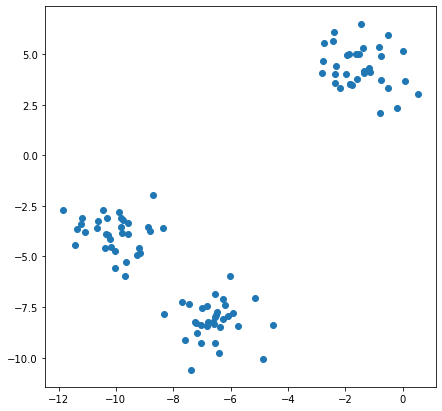

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [4]:
# Используем евклидову метрику. Реализуем функцию для её подсчёта.

def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В роли центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [5]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесём объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [6]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесём на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесём объекты, раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [11]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчёта и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

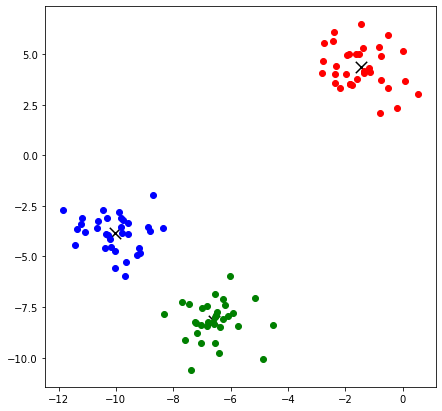

In [12]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [13]:
clusters

{0: [array([-0.79415228,  2.10495117]),
  array([-2.76017908,  5.55121358]),
  array([-1.17104176,  4.33091816]),
  array([-2.4067182 ,  6.09894447]),
  array([-2.34673261,  3.56128423]),
  array([-1.34052081,  4.15711949]),
  array([-1.35938959,  4.05424002]),
  array([-0.19745197,  2.34634916]),
  array([-1.92744799,  4.93684534]),
  array([-2.8020781 ,  4.05714715]),
  array([-1.85139546,  3.5188609 ]),
  array([-1.98197711,  4.02243551]),
  array([-0.75796919,  4.90898421]),
  array([0.5260155 , 3.00999353]),
  array([-2.77687025,  4.64090557]),
  array([-1.78245013,  3.47072043]),
  array([-1.53940095,  5.02369298]),
  array([-1.61734616,  4.98930508]),
  array([-1.14663009,  4.10839703]),
  array([-2.41395785,  5.65935802]),
  array([-1.83198811,  3.52863145]),
  array([-0.82057649,  5.33759195]),
  array([2.42271161e-04, 5.14853403e+00]),
  array([-2.18773166,  3.33352125]),
  array([-0.52793052,  5.92630669]),
  array([-2.35122066,  4.00973634]),
  array([-0.52579046,  3.306598

In [14]:
centroids

[array([-1.4710815 ,  4.33721882]),
 array([-6.58196786, -8.17239339]),
 array([-10.04935243,  -3.85954095])]

Будем использовать формулу

- Среднее квадратичное внутрикластерное расстояние.

    $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [18]:
def mean_square_into_cluster_distance(centroids, clusters):
    dist_sum = []
    for idx, cluster in clusters.items():
        cluster_list = []
        for el in cluster:
            dist = e_metrics(el, centroids[idx])
            cluster_list.append(dist ** 2)
        dist_sum.append(np.mean(cluster_list))
    return sum(dist_sum)

In [19]:
print(mean_square_into_cluster_distance(centroids, clusters))

4.682216258738468


In [22]:
ks = list(range(1, 11))
ks

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
mean_square_distance = []
for k in ks:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    dist = mean_square_into_cluster_distance(centroids, clusters)
    mean_square_distance.append(dist)
    
print(mean_square_distance)

[41.18153777704472, 10.881849094602702, 4.682216258738468, 4.834363560848225, 4.715237884593066, 5.692331738106566, 5.48129814571242, 5.619563724867451, 5.915459205429209, 5.696782421502369]


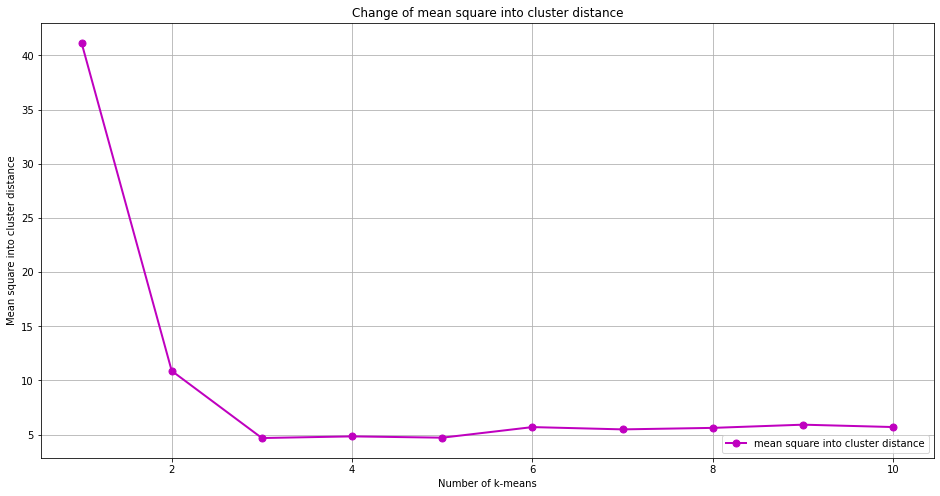

In [26]:
# Визуализируем изменение среднего квадратичного внутрикластерного расстояния.
plt.figure(figsize= (16, 8))

plt.plot(ks, mean_square_distance, 'm-o', linewidth=2, markersize=7,  label = 'mean square into cluster distance' )
plt.title('Change of mean square into cluster distance')
plt.xlabel('Number of k-means')
plt.ylabel('Mean square into cluster distance')
plt.grid()
plt.legend(loc='lower right')

**Выводы**

Как показывает график (метод локтя), действительно оптимальным количеством k-means является 3.